<a href="https://colab.research.google.com/github/Bao28072002/Python_Retail-Online-Dataset/blob/main/Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import squarify as sq

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ecommerce_retail_xlsx='/content/drive/MyDrive/Portfolio/Python/data/Final Project/ecommerce retail.xlsx'

In [ ]:
df = pd.read_excel(ecommerce_retail_xlsx)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.duplicated().sum()

np.int64(5268)

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
df['InvoiceNo'].astype(str).str.startswith('C')

,InvoiceNo
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
Unit_Quan_0 = df[(df['UnitPrice'] <= 0) | (df['Quantity'] <= 0)]
Unit_Quan_0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [ ]:
df.drop(Unit_Quan_0.index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


## RFM


In [ ]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
current_date = datetime(2011, 12, 31)

In [ ]:
df = df.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo':'count',
     'TotalAmount':'sum'
     }
)

In [ ]:
df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetary'}, inplace=True)
df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,182,4310.00
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,17,334.40


In [ ]:
r_labels = range(5, 0, -1)
f_labels = range(1,6)
m_labels = range(1,6)


In [ ]:
df['R_score'] = pd.qcut(df['Recency'],5, labels=r_labels)
df['F_score'] = pd.qcut(df['Frequency'],5, labels=f_labels)
df['M_score'] = pd.qcut(df['Monetary'],5, labels=m_labels)
df['RFM Score'] = (
    df['R_score'].astype(str)+
    df['F_score'].astype(str)+
    df['M_score'].astype(str)
    ).astype('int')
df = df.reset_index()
df.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM Score
0,12346.0,346,1,77183.60,1,1,5,115
1,12347.0,23,182,4310.00,5,5,5,555
2,12348.0,96,31,1797.24,2,3,4,234
3,12349.0,39,73,1757.55,4,4,4,444
4,12350.0,331,17,334.40,1,2,2,122


In [ ]:
seg_rank= pd.read_excel('/content/drive/MyDrive/Portfolio/Python/data/Final Project/ecommerce retail.xlsx',sheet_name='Segmentation')
seg_rank

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
seg_rank['RFM Score'] = seg_rank['RFM Score'].str.split(',')
seg_rank = seg_rank.explode('RFM Score').reset_index(drop=True)
seg_rank['RFM Score'] = seg_rank['RFM Score'].str.strip().astype(int)
seg_rank

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
data_join = df.merge(seg_rank, how='left', on='RFM Score')
data_join

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM Score,Segment
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347.0,23,182,4310.00,5,5,5,555,Champions
2,12348.0,96,31,1797.24,2,3,4,234,At Risk
3,12349.0,39,73,1757.55,4,4,4,444,Loyal
4,12350.0,331,17,334.40,1,2,2,122,Hibernating customers
...,...,...,...,...,...,...,...,...,...
4333,18280.0,298,10,180.60,1,1,1,111,Lost customers
4334,18281.0,201,7,80.82,1,1,1,111,Lost customers
4335,18282.0,28,12,178.05,5,1,1,511,New Customers
4336,18283.0,24,756,2094.88,5,5,5,555,Champions


### Data Cleaning


{'whiskers': [<matplotlib.lines.Line2D at 0x7c45c05cb8c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c45cb91be00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c45c057e120>],
 'medians': [<matplotlib.lines.Line2D at 0x7c45cb91b800>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c45cb91b500>],
 'means': []}

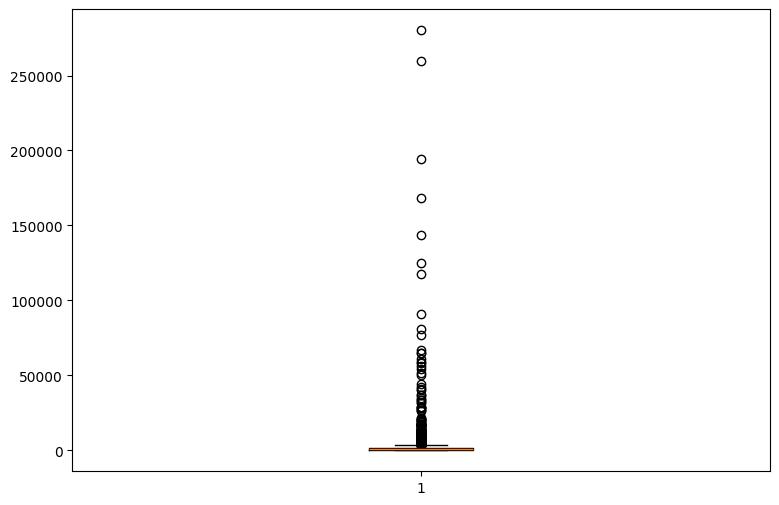

In [ ]:
fig=plt.figure(1,figsize=(9,6))
plt.boxplot(data_join['Monetary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c45cb987170>,
 'caps': [<matplotlib.lines.Line2D at 0x7c45cb987740>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c45cb986e40>],
 'medians': [<matplotlib.lines.Line2D at 0x7c45cb987d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c45cb987ec0>],
 'means': []}

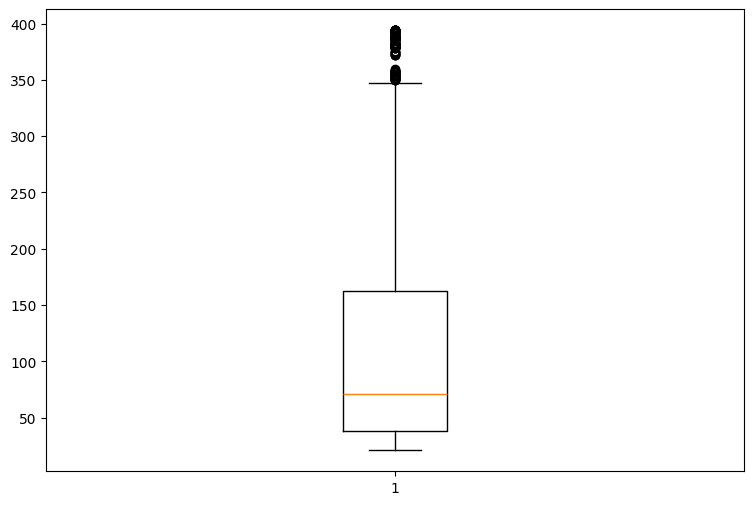

In [ ]:
fig=plt.figure(1,figsize=(9,6))
plt.boxplot(data_join['Recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c45cb7c2480>,
 'caps': [<matplotlib.lines.Line2D at 0x7c45cb7c0950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c45cb7c1040>],
 'medians': [<matplotlib.lines.Line2D at 0x7c45cb7c0d40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c45cb7c29c0>],
 'means': []}

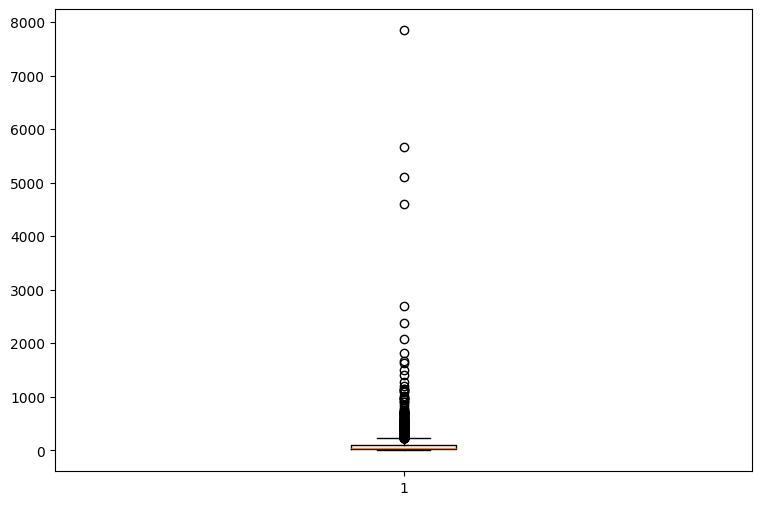

In [ ]:
fig=plt.figure(1,figsize=(9,6))
plt.boxplot(data_join['Frequency'])

In [ ]:
Q1 = data_join['Monetary'].quantile(0.25)
Q3 = data_join['Monetary'].quantile(0.75)
IQR = Q3 - Q1
data_join = data_join[(data_join['Monetary'] >= Q1 - 1.5*IQR) & (data_join['Monetary'] <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = data_join['Recency'].quantile(0.25)
Q3 = data_join['Recency'].quantile(0.75)
IQR = Q3 - Q1
data_join = data_join[(data_join['Recency'] >= Q1 - 1.5*IQR) & (data_join['Recency'] <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = data_join['Frequency'].quantile(0.25)
Q3 = data_join['Frequency'].quantile(0.75)
IQR = Q3 - Q1
data_join = data_join[(data_join['Frequency'] >= Q1 - 1.5*IQR) & (data_join['Frequency'] <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7c45cb30bd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7c45cb34b6e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c45cb30ba40>],
 'medians': [<matplotlib.lines.Line2D at 0x7c45cb348b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c45cb348740>],
 'means': []}

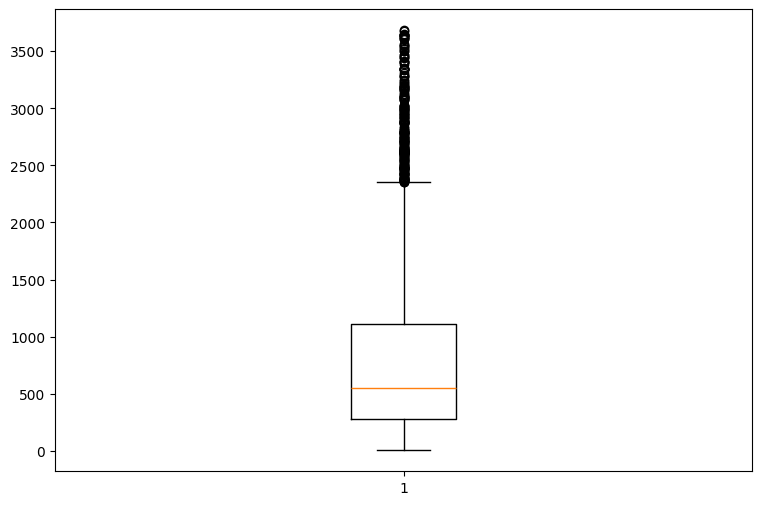

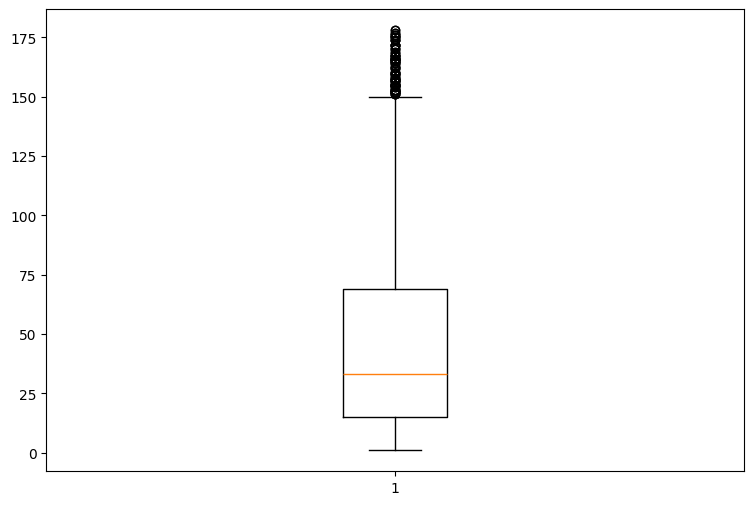

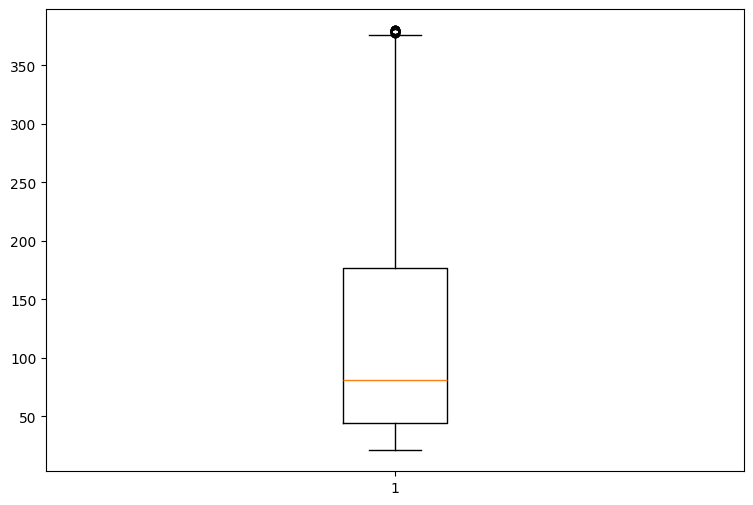

In [ ]:
fig=plt.figure(1,figsize=(9,6))
plt.boxplot(data_join['Monetary'])
fig=plt.figure(2,figsize=(9,6))
plt.boxplot(data_join['Frequency'])
fig=plt.figure(3,figsize=(9,6))
plt.boxplot(data_join['Recency'])

### Which metrics is important R, F or M?



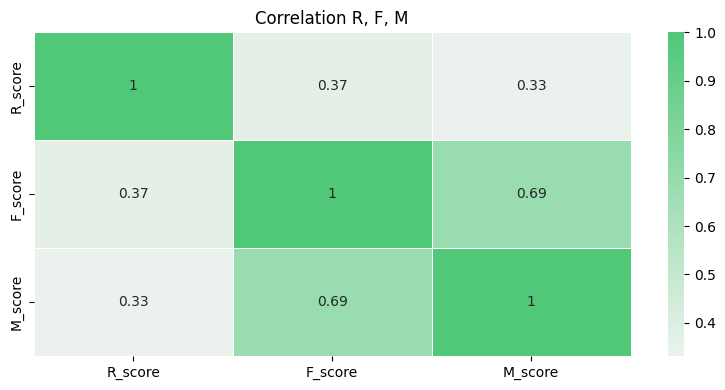

In [ ]:
plt.figure(figsize=(8,4))
corr = data_join[['R_score', 'F_score', 'M_score']].corr()
sns.heatmap(corr, annot=True, cmap=sns.light_palette("#50c878", as_cmap=True),linewidths=0.5, linecolor='white')
plt.title('Correlation R, F, M', fontsize=12)
plt.tight_layout()
plt.show()

**Recomand: Bộ phận Marketing nên tập trung vào hai chỉ số F và M**

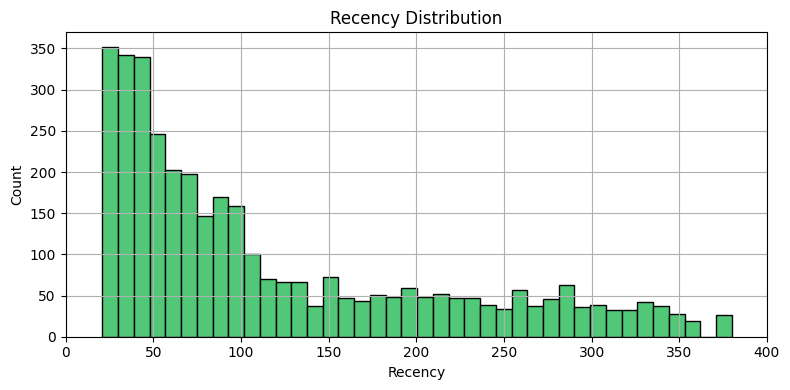

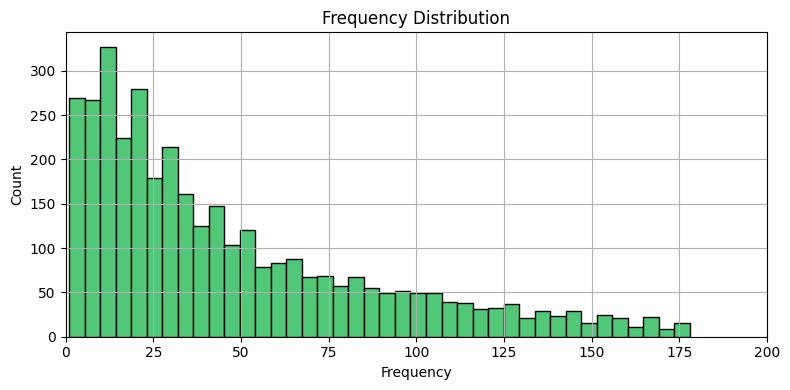

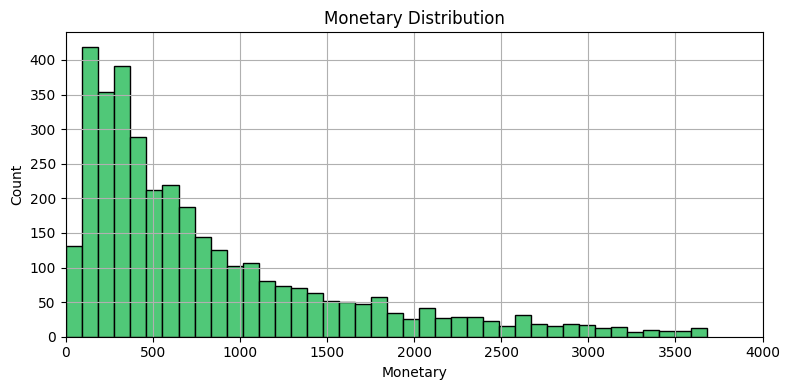

In [ ]:
features = ['Recency', 'Frequency', 'Monetary']
bins_dict = {'Recency': 40, 'Frequency': 40, 'Monetary': 40}
xlims = {
    'Recency': (0, 400),
    'Frequency': (0, 200),
    'Monetary': (0, 4000)
}
for col in features:
    plt.figure(figsize=(8, 4))
    data_join[col].hist(bins=bins_dict[col], color='#50c878', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xlim(xlims[col])
    plt.tight_layout()
    plt.show()



/tmp/ipython-input-2115797406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_join[col])


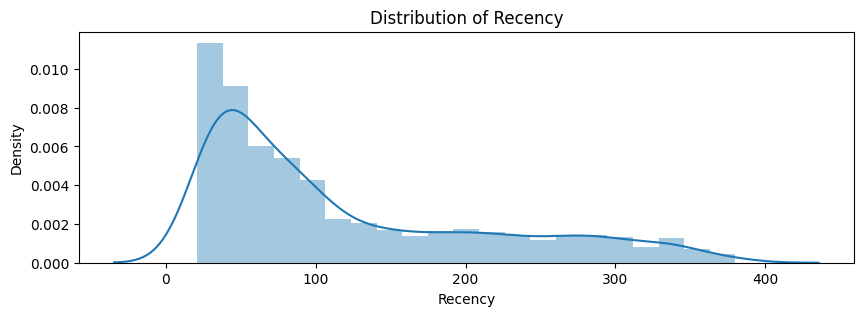

/tmp/ipython-input-2115797406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_join[col])


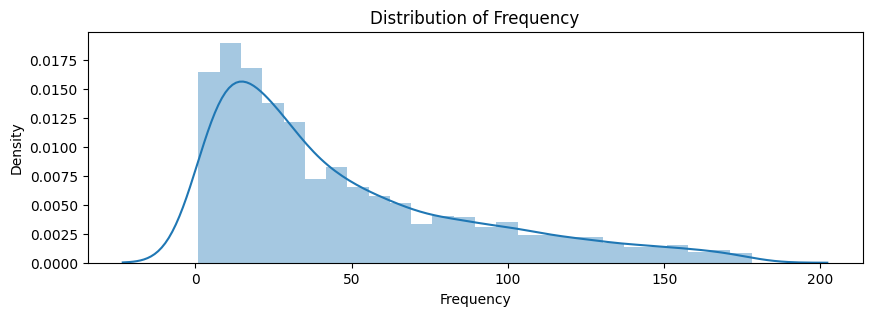

/tmp/ipython-input-2115797406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_join[col])


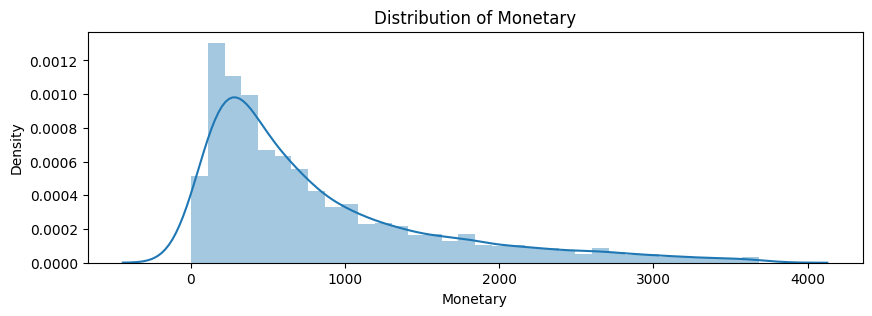

In [ ]:
colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
    fig, ax = plt.subplots(figsize=(10,3))
    sns.distplot(data_join[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

#### Overview Segmentation

In [ ]:
grp_total = (data_join.groupby('Segment').agg({'CustomerID': 'count','Monetary': 'sum'}).reset_index())
grp_total['Customer Percent(%)'] = (grp_total['CustomerID'] / grp_total['CustomerID'].sum() * 100).round(2)
grp_total['Sales Percent(%)'] = (grp_total['Monetary'] / grp_total['Monetary'].sum() * 100).round(2)
grp_total = grp_total.rename(columns={'CustomerID': 'Count ID'})
grp_total

,Segment,Count ID,Monetary,Customer Percent(%),Sales Percent(%)
0,About To Sleep,187,54420.400,5.23,1.86
1,At Risk,369,453379.700,10.32,15.52
2,Cannot Lose Them,79,107764.571,2.21,3.69
3,Champions,300,635369.450,8.39,21.75
4,Hibernating customers,789,319121.962,22.07,10.92
5,Lost customers,367,65421.650,10.27,2.24
6,Loyal,334,566604.100,9.34,19.39
7,Need Attention,220,252915.250,6.15,8.66
8,New Customers,308,64653.770,8.62,2.21
9,Potential Loyalist,495,287697.241,13.85,9.85


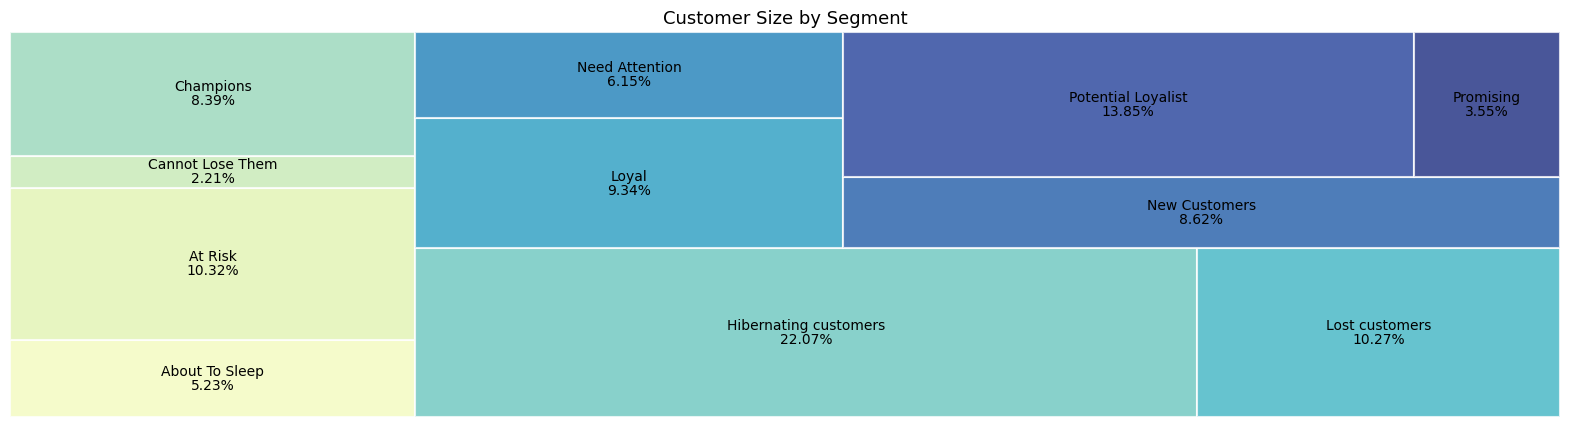

In [ ]:
colors = sns.color_palette("YlGnBu", len(grp_total))
fig,ax = plt.subplots(1, figsize=(20,5))
sq.plot(sizes=grp_total["Count ID"],
              label=grp_total["Segment"],
              value=[f'{x}%' for x in grp_total["Customer Percent(%)"]],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
              )
plt.title("Customer Size by Segment", fontsize=13)
plt.axis("off")
plt.show()



1.   Champions (8.39%) nhóm khách hàng tốt nhất, có tần suất mua cao và giá trị đơn hàng lớn.Cùng với Loyal (9.34%) và Potential Loyalist (13.85%), ba nhóm này chiếm tổng cộng 31.58% khách hàng là nguồn doanh thu chính của doanh nghiệp.
      *   Xây dựng chương trình khách hàng VIP với ưu đãi độc quyền, tích điểm thưởng, và quyền lợi đặc biệt.
      *  Cá nhân hóa đề xuất sản phẩm, tập trung vào sản phẩm cao cấp hoặc combo giá trị cao để gia tăng doanh thu.
2.   Hibernating Customers (22.07%), Lost Customers (10.27%), và About To Sleep (5.23%) chiếm tổng cộng 37.57%, tức hơn 1/3 lượng khách hàng đang không còn hoạt động tích cực.
      *   Gửi ưu đãi đặc biệt (giảm giá, quà tặng sinh nhật, hoặc voucher hoàn tiền).
      *  Triển khai chương trình chăm sóc cá nhân hóa để duy trì kết nối (ví dụ: follow-up sau mua, hỗ trợ kỹ thuật, ưu tiên dịch vụ).
3.   New Customers (8.62%) và Promising (3.55%) chiếm 12.17%, là nhóm khách hàng mới hoặc đang phát triển tiềm năng
      *   Tạo ấn tượng ban đầu tốt qua email chào mừng, hướng dẫn sử dụng, hoặc ưu đãi cho đơn hàng tiếp theo.
      *   huyến khích mua lại sớm để đưa họ vào nhóm Potential Loyalist thông qua tích điểm hoặc gói khuyến mãi định kỳ.











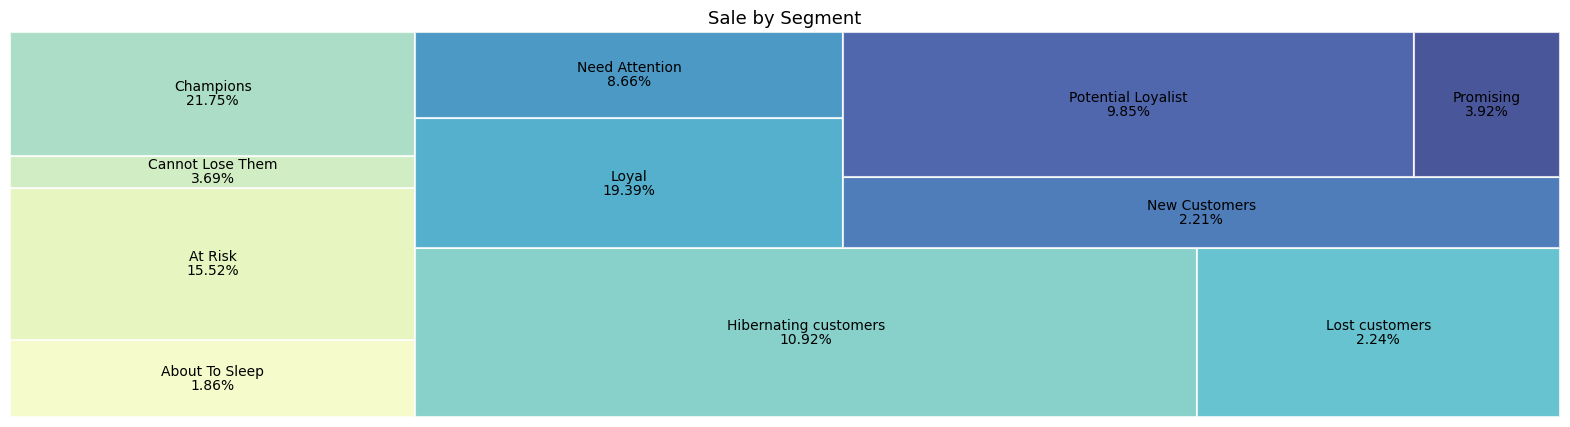

In [ ]:
fig,ax = plt.subplots(1, figsize=(20,5))
sq.plot(sizes=grp_total["Count ID"],
              label=grp_total["Segment"],
              value=[f'{x}%' for x in grp_total["Sales Percent(%)"]],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
              )
plt.title("Sale by Segment", fontsize=13)
plt.axis("off")
plt.show()

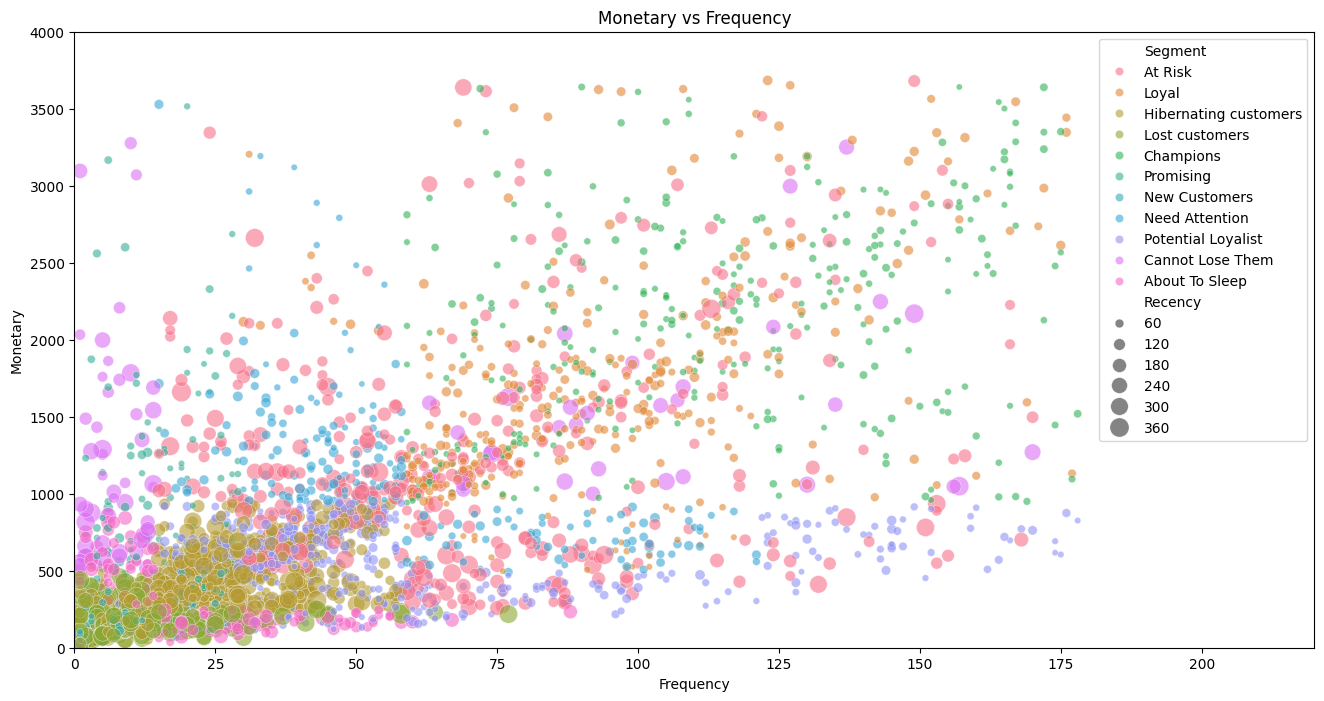

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x='Frequency',
    y='Monetary',
    hue='Segment',
    size='Recency',
    sizes=(20, 200),
    alpha=0.6,
    data=data_join
)
plt.title("Monetary vs Frequency")
plt.xlim(0, 220)
plt.ylim(0, 4000)
plt.show()

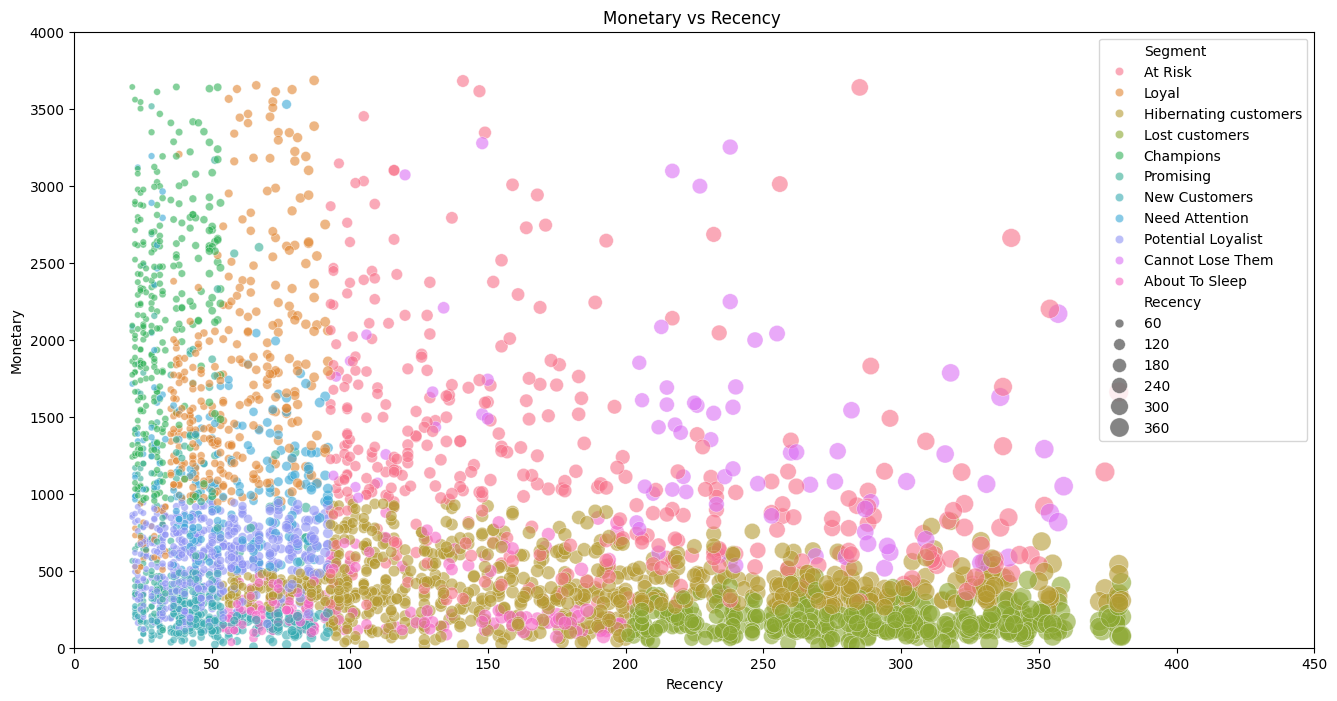

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x='Recency',
    y='Monetary',
    hue='Segment',
    size='Recency',
    sizes=(20, 200),
    alpha=0.6,
    data=data_join
)
plt.title("Monetary vs Recency ")
plt.xlim(0, 450)
plt.ylim(0, 4000)
plt.show()



*   Champions và Loyal tập trung ở khu vực tần suất và chi tiêu cao là nguồn doanh thu chính
*   At Risk, Lost, Hibernating nằm ở vùng tần suất thấp, nhiều bong bóng lớn đã lâu không mua hàng.
*   At Risk và Lost xuất hiện nhiều ở Recency cao cho thấy mất khách hàng trung thành
*   Need Attention, Potential Loyalist nằm ở vùng giữa nhóm tiềm năng để chuyển thành khách trung thành nên quan tâm và chú ý





/tmp/ipython-input-3731395083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Segment', y='Recency', data=recency_mean, palette='viridis')


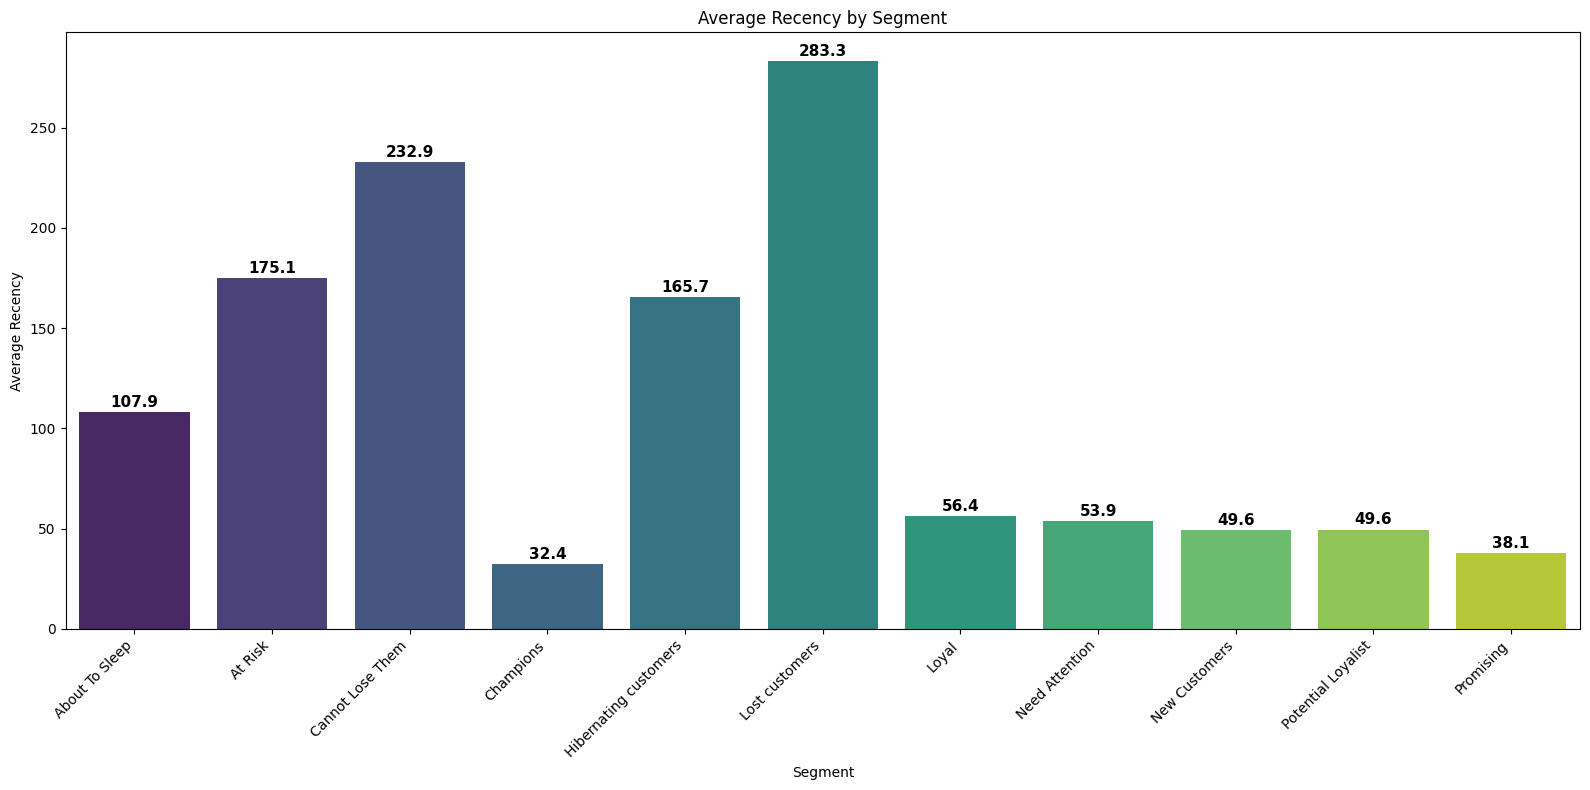

In [ ]:
recency_mean = data_join.groupby('Segment', as_index=False)['Recency'].mean()
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Segment', y='Recency', data=recency_mean, palette='viridis')
plt.title('Average Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Recency')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(recency_mean['Recency']):
    ax.text(i, v + 1, f"{v:.1f}", ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3703280900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Segment', y='Frequency', data=frequency_mean, palette='viridis')


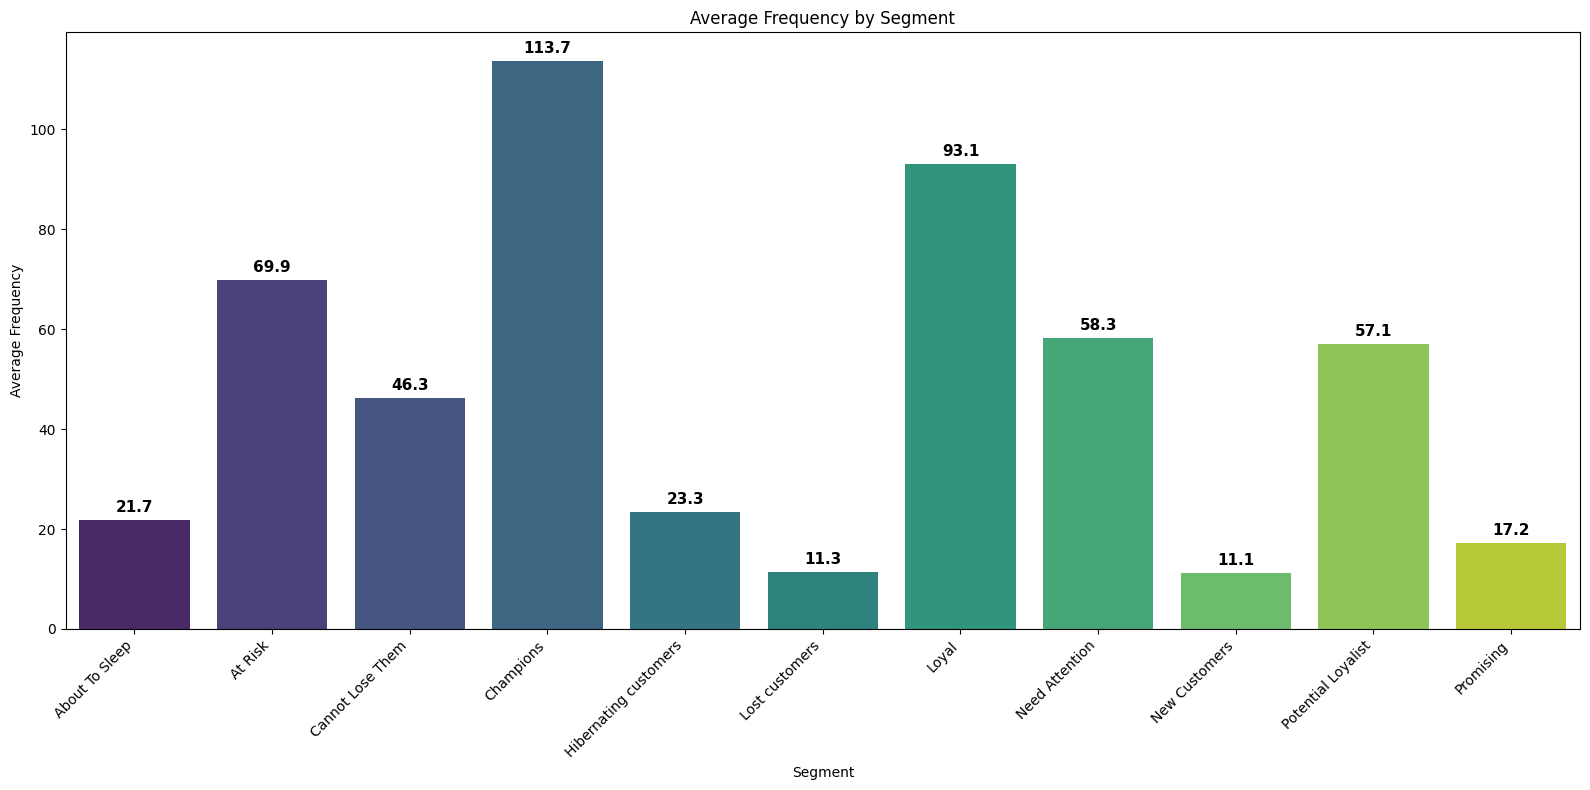

In [ ]:
frequency_mean = data_join.groupby('Segment', as_index=False)['Frequency'].mean()
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Segment', y='Frequency', data=frequency_mean, palette='viridis')
plt.title('Average Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(frequency_mean['Frequency']):
    ax.text(i, v + 1, f"{v:.1f}", ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

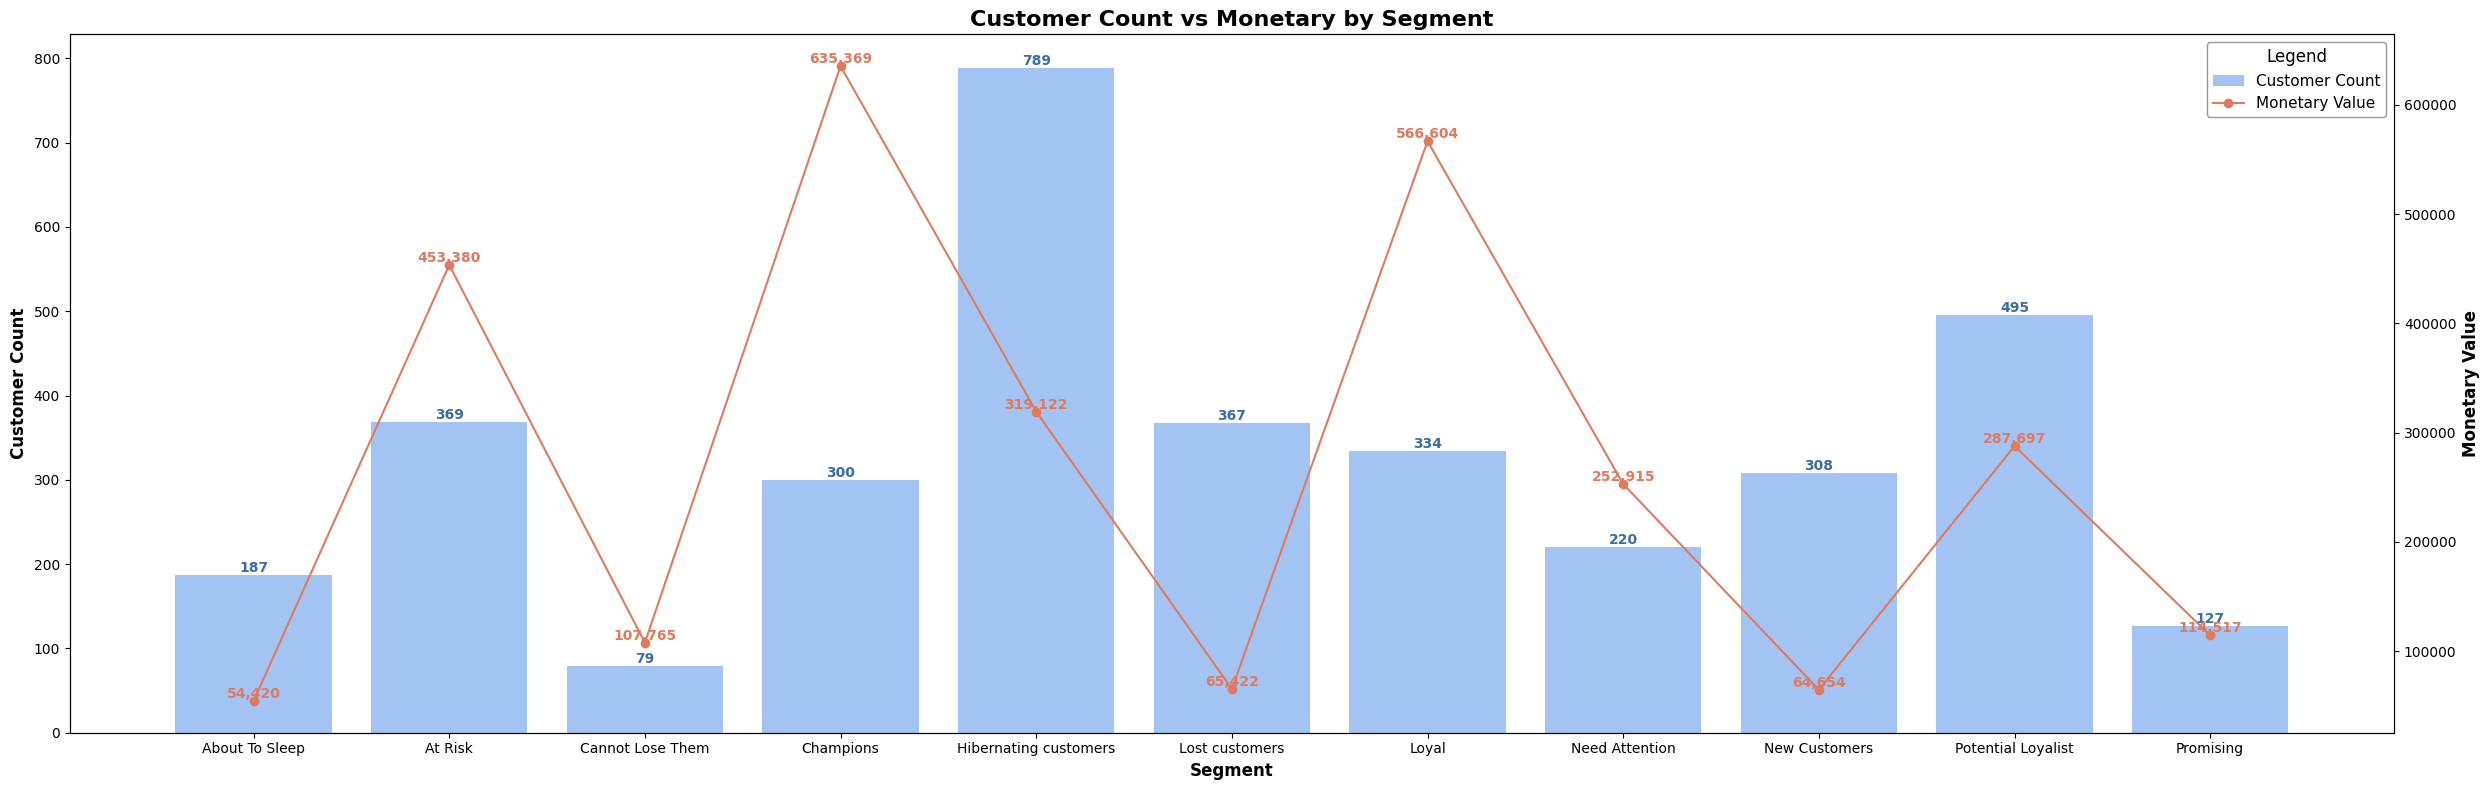

In [ ]:
fig, ax1 = plt.subplots(figsize=(25,8))
bars = ax1.bar(grp_total['Segment'], grp_total['Count ID'], color='#A3C4F3', label='Customer Count')
ax2 = ax1.twinx()
line = ax2.plot(grp_total['Segment'], grp_total['Monetary'], color='#E07A5F', marker='o', label='Monetary Value')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=10, color='#3A6EA5', fontweight='bold')
for i, v in enumerate(grp_total['Monetary']):
    ax2.text(i, v, f'{v:,.0f}', color='#E07A5F', fontsize=10, ha='center', va='bottom', fontweight='bold')
ax1.set_xlabel('Segment', fontsize=12, fontweight='bold')
ax1.set_ylabel('Customer Count', color='black', fontsize=12, fontweight='bold')
ax2.set_ylabel('Monetary Value', color='black', fontsize=12, fontweight='bold')
plt.title('Customer Count vs Monetary by Segment', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11, fontweight='bold')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2,
            loc='upper right', fontsize=11, frameon=True, facecolor='white',
            edgecolor='gray', title='Legend', title_fontsize=12)
plt.tight_layout()
plt.show()
